# Etvity 3 - Eoin Gohery - 17206413 - Clustering and Manifold Learning

### Import Python Modules

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

## Task 1: Load the dataset

### A. Read the Dataset

All data is Numerical

In [265]:
df = pd.read_csv("loans_train_prepared-1.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


### B. Rescale the Data


In [266]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

## Task 2: Clustering

### A. Create Scatterplot Function

In [267]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple', 'yellow'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### B. K-Means Clustering

In [268]:
#Number of clusters k.
k = 4

In [269]:
#Run k-Means
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=25, max_iter=500).fit(data)

### C. Apply a manifold-learning technique to project the data set to a 2D space

In [270]:
#Append the cluster centers to the dataset.
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### C1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

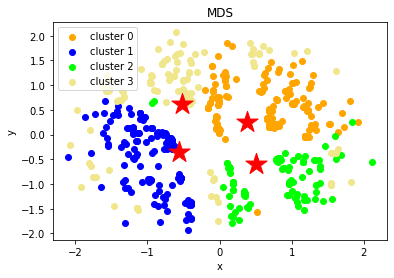

In [271]:
#Project both the data and the k-Means cluster centers to 2D.
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)

#Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### C2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

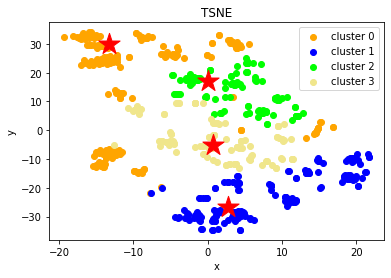

In [293]:
#Project both the data and the k-Means cluster centers to 2D.
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)

#Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### D. Cluster Analysis#
#### Add the cluster labels as an extra column in the original dataframe

In [286]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)
df.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0.000000,1.084523,1.058140,0.75,1,1,0,0,0,0,0,0,0,1,1,0.841086,1
1,0.333333,0.925883,1.047319,0.75,1,1,0,1,0,0,0,0,0,0,0,0.871711,3
2,0.000000,0.683858,0.635920,0.75,1,1,0,1,0,1,0,0,0,1,1,0.385189,1
3,0.000000,0.608992,1.002824,0.75,1,1,0,1,0,0,0,1,0,1,1,0.717012,1
4,0.000000,1.101869,1.115650,0.75,1,1,0,0,0,0,0,0,0,1,1,0.860305,1


In [287]:
df.tail()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
609,0.000000,0.666409,0.676143,0.750,1,0,0,0,0,0,0,0,0,0,1,0.364708,2
610,1.000000,0.858916,0.395858,0.375,1,1,0,1,0,0,0,0,0,0,1,0.587496,0
611,0.333333,1.313719,1.566110,0.750,1,1,0,1,0,0,0,0,0,1,1,1.116075,1
612,0.666667,1.267616,1.325676,0.750,1,1,0,1,0,0,0,0,0,1,1,1.042256,1
613,0.000000,0.925883,1.074155,0.750,0,0,0,0,0,1,0,0,1,0,0,0.663523,3


#### Compute the mean value of each attribute for each cluster

In [288]:
df.groupby('cluster').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,
0,0.323625,0.926256,1.130333,0.715898,0.990291,0.878641,0.019417,1.000000,0.000000,0.155340,0.043689,0.194175,0.655340,0.000000,0.932039,0.916496
1,0.255814,0.908651,1.044120,0.692297,0.994186,0.837209,0.017442,0.656977,0.005814,0.110465,0.069767,0.162791,0.000000,1.000000,0.773256,0.854186
2,0.102564,0.913106,1.012341,0.735256,0.974359,0.572650,0.017094,0.000000,0.017094,0.136752,0.068376,0.247863,0.615385,0.000000,0.820513,0.792113
3,0.249300,0.914750,1.091759,0.717857,0.302521,0.815126,0.033613,0.663866,0.000000,0.126050,0.025210,0.310924,0.218487,0.252101,0.008403,0.851207


### E. Conclusion

By looking at the table above we can argue that:
* Applicant income in similar amoung all groups.
* Majority of the applicants appear to be male.


* Cluster 0: All subjects in this cluster are married and do not live in urban areas. High majority are male and have an outstanding loan. Said loan has a higher amount than any other group.
* Cluster 1: All subjects in this cluster live in urban areas and have a higher level of education, yet the lowest income and loan status of any group.
* Cluster 2: No subjects in this cluster are married and have the lowest mean for dependants. Group is likely lower age to the other groups. Group is also split more evenly between male and female applicants.
* Cluster 3: Extremely low credit history and loan status, potentially due to the higher rate of non graduates found in this group.

## Task 3: Elbow Method
### A. Sum of the squared distances

In [337]:
sse = {}
for i in range(1, 10):
    kmeans = cluster.KMeans(n_clusters=i, max_iter=2000).fit(data)
    df["cluster"] = kmeans.labels_

    # Inertia: Sum of distances of samples to their closest cluster center
    sse[i] = kmeans.inertia_ 

### B. Determine _k_ using Elbow Method

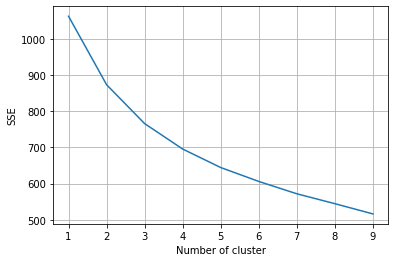

In [338]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.grid(True)
plt.show()

Elbow method does not produce a very drastic change at any point. This indicates that the dataset is not very clustered. 

### C. K-Means Cluster using new _k_ value

Based on the results above, there is no new value of k for me to test. A different method beyond KMeans may be required to determine a more accurate depiction of any clusters present in the dataset.

## Task 4: Additional Clustering Algorithm

In [292]:
#TODO